# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils as cu
import db_utils as db
import os
import pandas as pd
import importlib

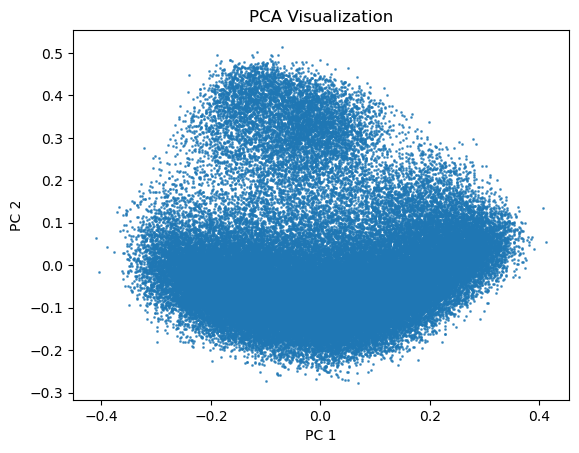

In [2]:
# get folder outside current directory (project folder)
current_dir = os.path.dirname(os.getcwd())
proj_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Load the 2D coordinates
coordinates = np.load(proj_dir + "/dataset/pubmed_20241121_working_memory.embd.pca5.npy")

# Scatter plot
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=1, alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


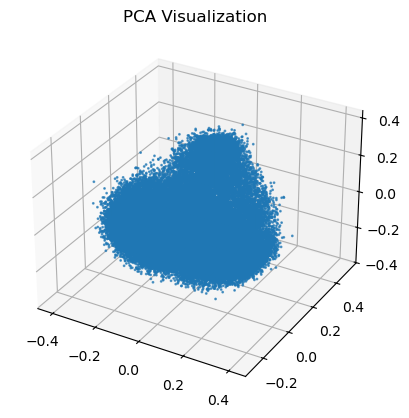

In [3]:
# plot in 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], s=1, alpha=0.7)
plt.title("PCA Visualization")
plt.show()

In [4]:
coordinates.shape

(73763, 5)

## Clustering

### hdbscan

In [3]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


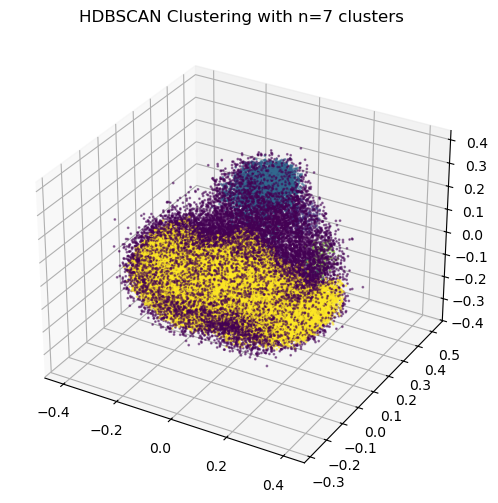

In [ ]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, min_cluster_size=10, plot=1, dim3=True)

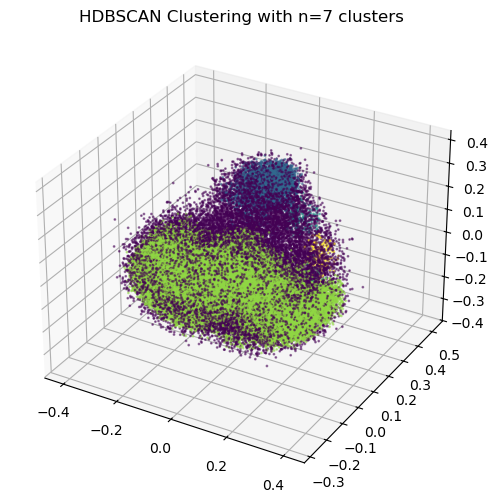

In [7]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, 
                                    min_cluster_size=20, min_samples=10, 
                                    plot=1, dim3=True)

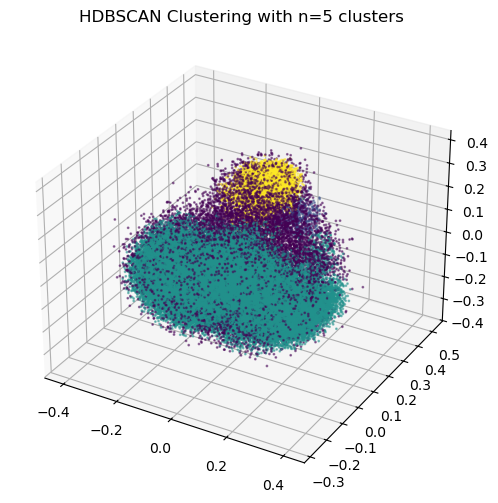

In [10]:
importlib.reload(cu)
hdbscan_labels = cu.hdbscan_cluster(coordinates, 
                                    min_cluster_size=50, min_samples=20, 
                                    gen_min_span_tree=True, plot=1, dim3=True)

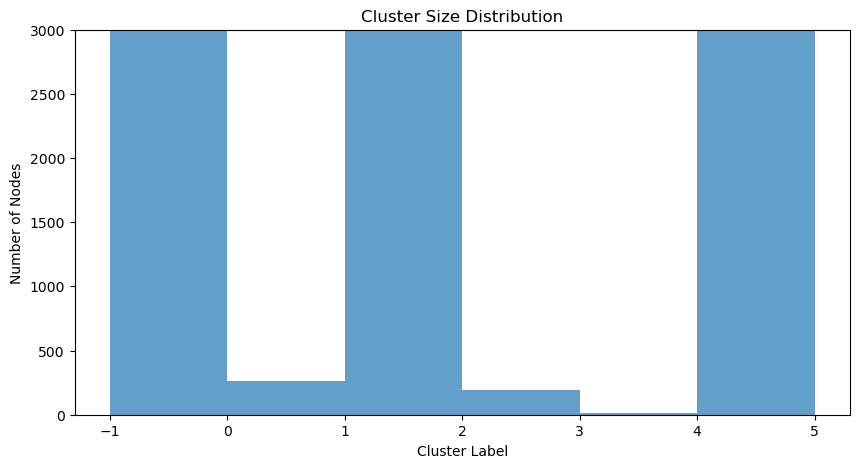

In [6]:
# plot cluster size distribution

plt.figure(figsize=(10, 5))
plt.hist(hdbscan_labels, bins=np.arange(-1, hdbscan_labels.max()+1, 1), alpha=0.7)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Nodes")
plt.ylim(0, 3000)
plt.show()

### K-means clustering

Let's start with a random number of clusters... (use same # found from hdbscan)

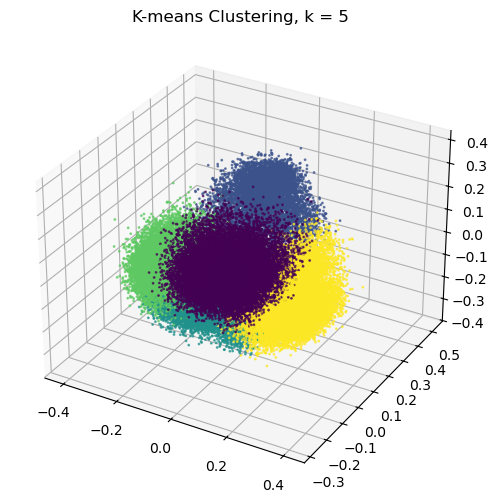

In [21]:
# Plot the clusters
importlib.reload(cu)
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=5, plot=1, dim3=True)

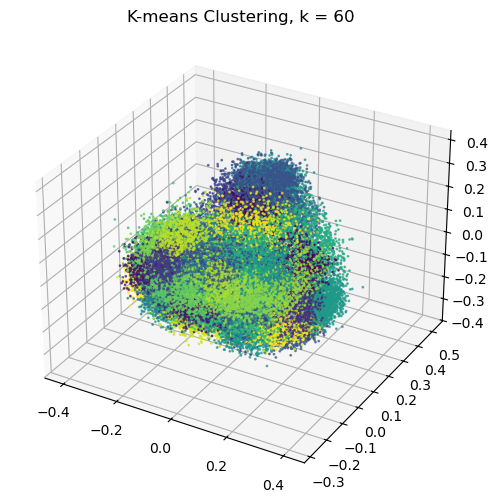

In [8]:
# Plot the clusters
importlib.reload(cu)
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=60, plot=1, dim3=True)

#### Optimal cluster number

Best number of clusters:  9
Best score:  1656.3656005859375


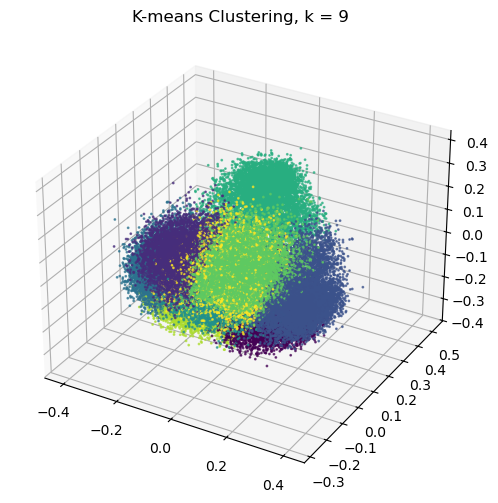

In [19]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(1, 10, 1)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1, dim3=True)

Best number of clusters:  90
Best score:  629.712158203125


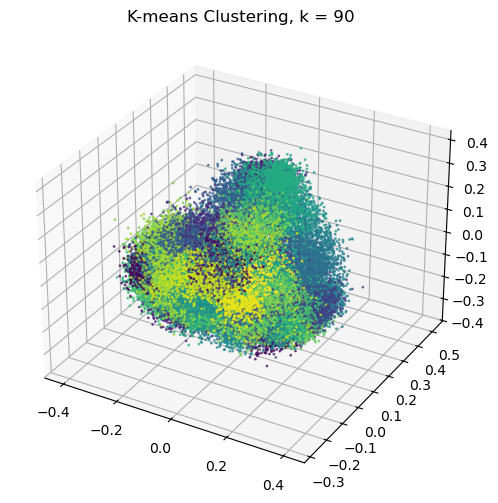

In [17]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(10, 100, 10)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1, dim3=True)

Best number of clusters:  900
Best score:  250.40573120117188


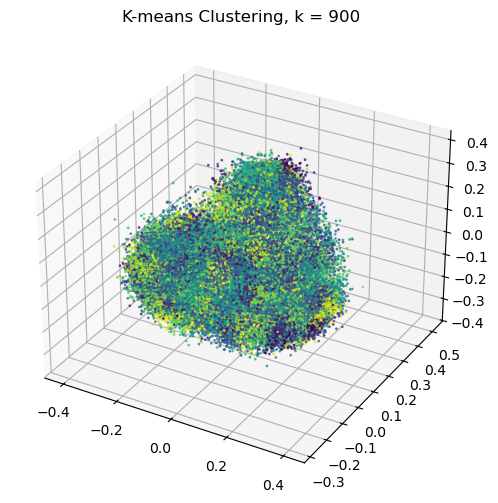

In [18]:
# test kmeans for optimal number of clusters (using inertia)
importlib.reload(cu)
cluster_range = np.arange(100, 1000, 100)
best_k, best_score = cu.find_best_k(coordinates, method='inertia', range_k = cluster_range, plot=0)
print("Best number of clusters: ", best_k)
print("Best score: ", best_score)

# plot clusters with best k
kmeans_labels = cu.kmeans_cluster(coordinates, n_clusters=best_k, plot=1, dim3=True)

### Louvain

## Stats

In [9]:
df = pd.read_csv(
            proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
            sep="\t"
        )

df.head()

pmid                                              title  \
0   710  Effect of two weeks' treatment with thioridazi...   
1  2563  EEG sleep studies of insomniacs under flunitra...   
2  2812  Alcohol and backward masking of visual informa...   
3  2813  Recovery of verbal short-term memory in alcoho...   
4  6497  Effect of counterconditioning on test anxiety ...   

                             journal  year  \
0                Psychopharmacologia  1975   
1   International pharmacopsychiatry  1975   
2      Journal of studies on alcohol  1976   
3      Journal of studies on alcohol  1976   
4  Journal of educational psychology  1976   

                                            abstract  \
0  Forty paid healthy male students participated ...   
1  This study investigates the effect of flunitra...   
2  Alcohol increased the time necessary to transf...   
3  When given a short-term memory distractor test...   
4                                                NaN   

                                          mesh_terms  \
0  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics  
0  pharmacology;blood;pharmacology;pharmacology;p...  
1  therapeutic use;drug effects;adverse effects;p...  
2             pharmacology;drug effects;drug effects  
3  complications;complications;drug effects;drug ...  
4                                                NaN

In [10]:
importlib.reload(db)
points_df = db._get_points_df(None,
                  path_tsv = proj_dir + "/dataset/pubmed_20241121_working_memory.raw",
                  delimiter = "\t",
                  points = coordinates,
                  )
points_df.head()

* loaded df
* merged embds to df


pmid                                         mesh_terms  \
0   710  Adult;Animals;Anti-Anxiety Agents;Bromazepam;C...   
1  2563  Adult;Anti-Anxiety Agents;Dreams;Electroenceph...   
2  2812  Adult;Dose-Response Relationship, Drug;Ethanol...   
3  2813  Adult;Age Factors;Aged;Alcohol Amnestic Disord...   
4  6497  Achievement;Adolescent;Anxiety;Behavior Therap...   

                                         mesh_topics         x         y  
0  pharmacology;blood;pharmacology;pharmacology;p...  0.213352 -0.024615  
1  therapeutic use;drug effects;adverse effects;p...  0.193741  0.061694  
2             pharmacology;drug effects;drug effects -0.021743 -0.021289  
3  complications;complications;drug effects;drug ...  0.043184 -0.102067  
4                                                NaN -0.002772 -0.019995

### hdbscan

In [11]:
print(np.unique(kmeans_labels))
# print(np.sum(hdbscan_labels == -1))
print(len(kmeans_labels))
# print(np.sum(hdbscan_labels == -1) / len(hdbscan_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
73763


In [22]:
from collections import defaultdict

cluster_terms = defaultdict(list)
for index, label in enumerate(kmeans_labels):
# for index, label in enumerate(hdbscan_labels):
    # skip if cluster -1 (noise)
    if label == -1:
        continue

    mesh_terms = points_df.iloc[index, points_df.columns.get_loc("mesh_terms")]

    # Check if the 'mesh_terms' is NaN or missing
    if pd.isna(mesh_terms):
        continue  # Skip this iteration if mesh_terms is NaN

    # Otherwise, split the terms and add them to the cluster_terms
    cluster_terms[label].extend(
        [t for t in mesh_terms.split(";")]
    )

In [23]:
cluster_terms

defaultdict(list,
            {50: ['Adult',
              'Animals',
              'Anti-Anxiety Agents',
              'Bromazepam',
              'Chlorpromazine',
              'Clinical Trials as Topic',
              'Drug Synergism',
              'Ethanol',
              'Humans',
              'Male',
              'Memory, Short-Term',
              'Paired-Associate Learning',
              'Psychotropic Drugs',
              'Rabbits',
              'Receptors, Drug',
              'Sulpiride',
              'Thioridazine',
              'Adrenocorticotropic Hormone',
              'Aged',
              'Clinical Trials as Topic',
              'Cognition',
              'Humans',
              'Memory, Short-Term',
              'Middle Aged',
              'Peptide Fragments',
              'Reaction Time',
              'Word Association Tests',
              'Adrenocorticotropic Hormone',
              'Aged',
              'Arousal',
              'Association',
      

In [24]:
# Step 1: Extract unique values across all lists
unique_values = set(value for values in cluster_terms.values() for value in values)

# Step 2: Create a mapping of each unique value to an index
value_to_index = {value: idx for idx, value in enumerate(sorted(unique_values))}

# Step 3: Update the original dictionary to replace values with their indices
indexed_dict = {key: [value_to_index[value] for value in values] for key, values in cluster_terms.items()}

print(indexed_dict)

{50: [306, 645, 696, 1539, 2150, 2313, 3423, 3906, 5368, 6587, 6794, 8185, 9314, 9489, 9712, 10994, 11318, 302, 345, 2313, 2376, 5368, 6794, 7029, 8371, 9599, 12140, 302, 345, 913, 992, 1030, 1199, 1497, 1810, 4111, 5368, 6587, 6794, 7029, 9599, 11976, 306, 696, 2313, 3160, 5368, 6435, 6786, 6794, 6827, 7029, 8367, 8711, 8967, 345, 2313, 3010, 3399, 4111, 4405, 5368, 6587, 6794, 7029, 7410, 9274, 345, 2313, 3010, 4111, 4405, 5368, 6587, 6786, 7029, 7410, 7619, 9274, 9599, 144, 264, 306, 467, 2313, 5368, 6587, 6786, 6794, 8650, 306, 1490, 1643, 2313, 2784, 3362, 3426, 3603, 4111, 5049, 5368, 6587, 6826, 9599, 165, 306, 517, 737, 1030, 1401, 3118, 3603, 4111, 5049, 5368, 5474, 6587, 6794, 7207, 9120, 9350, 9599, 10142, 264, 2085, 3358, 3362, 4111, 5368, 5442, 5634, 6587, 6794, 6934, 8711, 9274, 165, 306, 739, 1030, 1078, 3362, 4111, 5368, 6587, 6794, 7207, 9599, 10538, 11381, 2522, 3002, 3232, 5043, 5368, 6794, 6821, 306, 370, 371, 1199, 1225, 1490, 2154, 3769, 4221, 5049, 5368, 6587, 67

In [25]:
# index to value
index_to_value = {idx: value for value, idx in value_to_index.items()}
# index_to_value

In [26]:
print(len(indexed_dict[0]))
print(len(np.unique(indexed_dict[0])))

7812
960


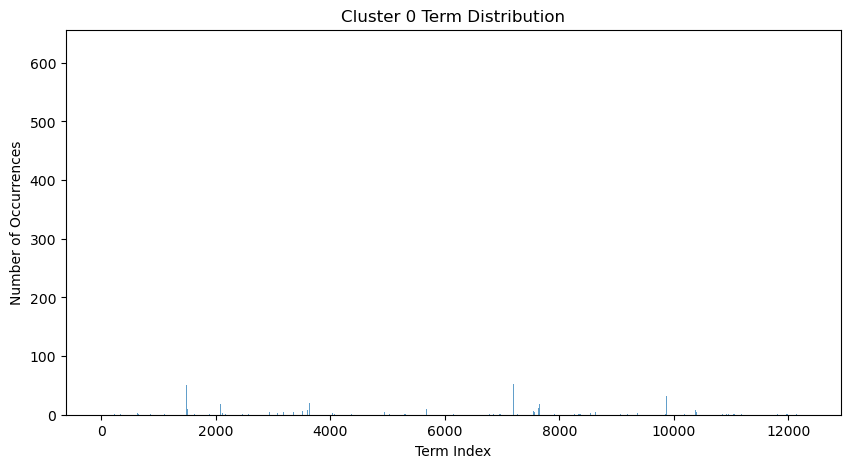

In [27]:
# plot the first key in the dictionary
plt.figure(figsize=(10, 5))
plt.hist(indexed_dict[0], bins=np.arange(0, len(value_to_index), 1), alpha=0.7)
plt.title("Cluster 0 Term Distribution")
plt.xlabel("Term Index")
plt.ylabel("Number of Occurrences")
# plt.ylim(0, 125)
plt.show()

In [29]:
# get the top 5 terms for each cluster
for clus in indexed_dict:
    term_idx = indexed_dict[clus]
    term_freq = np.bincount(term_idx)
    most_freq_idx = np.argsort(term_freq)[-30:-20]
    most_freq_term = [index_to_value[idx] for idx in most_freq_idx]
    print(f"Cluster {clus}: {most_freq_term} ({term_freq[most_freq_idx]} occurrences)")

Cluster 50: ['Alzheimer Disease', 'Plant Extracts', 'Cognitive Dysfunction', 'Brain', 'Memory Disorders', 'Dietary Supplements', 'Aged, 80 and over', 'Dose-Response Relationship, Drug', 'Time Factors', 'Affect'] ([ 74  79  81  82  83 105 107 122 124 127] occurrences)
Cluster 9: ['Depression', 'Memory Disorders', 'Double-Blind Method', 'Electroconvulsive Therapy', 'Exercise', 'Magnetic Resonance Imaging', 'Psychomotor Performance', 'Time Factors', 'Adolescent', 'Attention'] ([57 58 58 64 66 68 72 73 74 78] occurrences)
Cluster 0: ['Motivation', 'Photic Stimulation', 'Space Perception', 'Visual Perception', 'Cognition', 'Maze Learning', 'Choice Behavior', 'Mice', 'Columbidae', 'Conditioning, Operant'] ([52 55 58 58 59 60 60 60 62 65] occurrences)
Cluster 23: ['Child Development', 'Sex Factors', 'Emotions', 'Mental Recall', 'Memory Disorders', 'Inhibition, Psychological', 'Age Factors', 'Surveys and Questionnaires', 'Cross-Sectional Studies', 'Attention Deficit Disorder with Hyperactivity

In [30]:
from scipy.stats import mannwhitneyu

In [31]:
# perform Mann-Whitney U tests for all combos of clusters

# Create a list of cluster labels
cluster_labels = list(indexed_dict.keys())

p_values = np.ones((len(cluster_labels), len(cluster_labels)))

for i, label1 in enumerate(cluster_labels):
    for j, label2 in enumerate(cluster_labels):
        if i >= j:
            continue

        # Perform Mann-Whitney U test (non-parametric test)
        u_stat, p_value = mannwhitneyu(indexed_dict[label1], indexed_dict[label2])
        p_values[i, j] = p_value
        p_values[j, i] = p_value


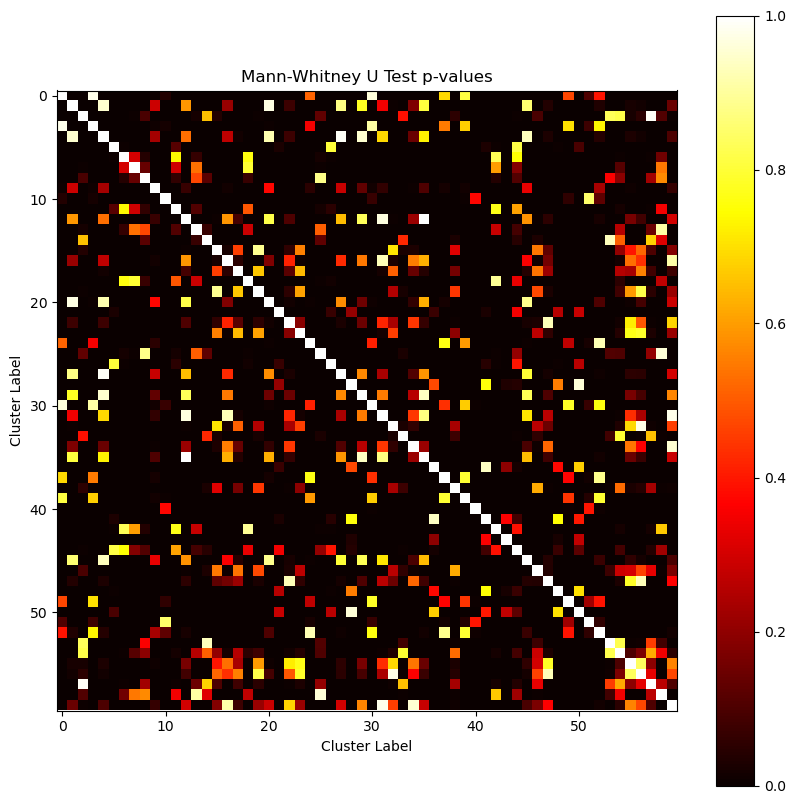

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(p_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test p-values")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

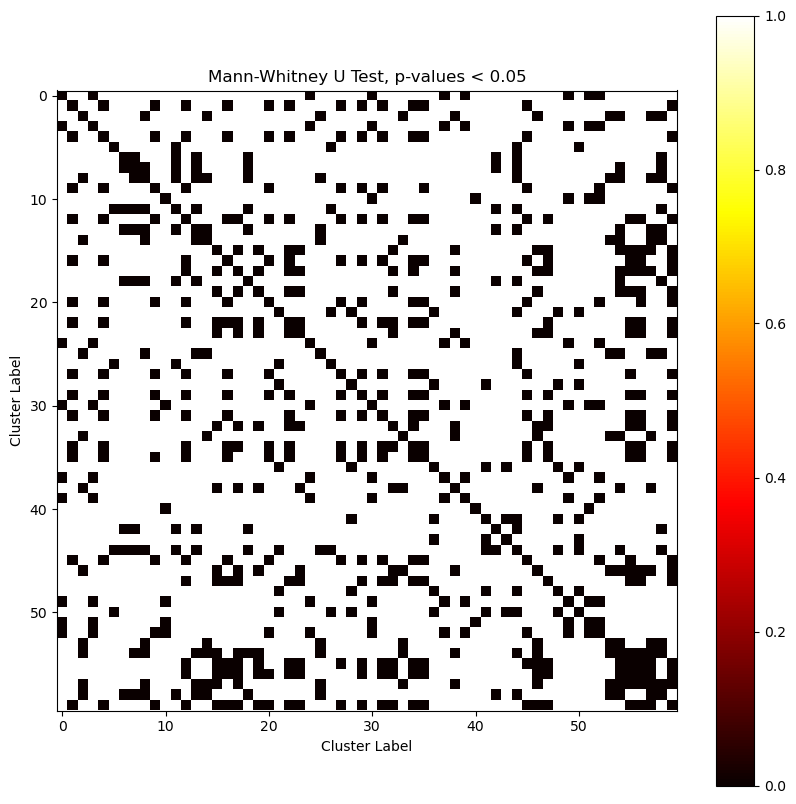

In [33]:
p_values_sig = np.where(p_values < 0.05, 1, 0)

plt.figure(figsize=(10, 10))
plt.imshow(p_values_sig, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Mann-Whitney U Test, p-values < 0.05")
plt.xlabel("Cluster Label")
plt.ylabel("Cluster Label")
plt.show()

In [34]:
# percentage of significant p-values
np.sum(p_values_sig) / (len(cluster_labels) ** 2)

0.8005555555555556